In [24]:
# Import numerical tools
import numpy as np

# Import statistical tools
from scipy import stats
np.random.seed(12345678) #If you specify a random seed, it will initialize the random number
    #generator the same way each time, making your results reproducible each time you rerun
    #the code. Note that multiple draws of a random number within the same session will still 
    #return different values.

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'svg',}
#%config InlineBackend.figure_formats = {'png', 'retina'}

#Import pandas for reading in and managing data
import pandas as pd

#Import seaborn (useful for plotting - makes plots pretty)
import seaborn as sns

KstestResult(statistic=0.2491093725750535, pvalue=6.7250183932721086e-06) 1
KstestResult(statistic=0.34051957239954433, pvalue=9.5016661205704622e-11) 2
KstestResult(statistic=0.28811239485867446, pvalue=9.0477066283511931e-08) 3
KstestResult(statistic=0.29012728112688069, pvalue=7.1117970623646443e-08) 4
KstestResult(statistic=0.24560722327300633, pvalue=9.5863254327976932e-06) 5
KstestResult(statistic=0.26993431919494038, pvalue=7.3213843809760704e-07) 6
KstestResult(statistic=0.27424410536158494, pvalue=4.5187903996435352e-07) 7
KstestResult(statistic=0.23175664786899886, pvalue=3.6996451109327921e-05) 8
KstestResult(statistic=0.25703288518306011, pvalue=2.9572335038530184e-06) 9
KstestResult(statistic=0.24402691881226468, pvalue=1.1229856578642838e-05) 10
KstestResult(statistic=0.28643915722395352, pvalue=1.1035009905846493e-07) 11
KstestResult(statistic=0.24886359778433217, pvalue=6.8956126266783713e-06) 12
KstestResult(statistic=0.26259906075223111, pvalue=1.6336870929389846e-06)

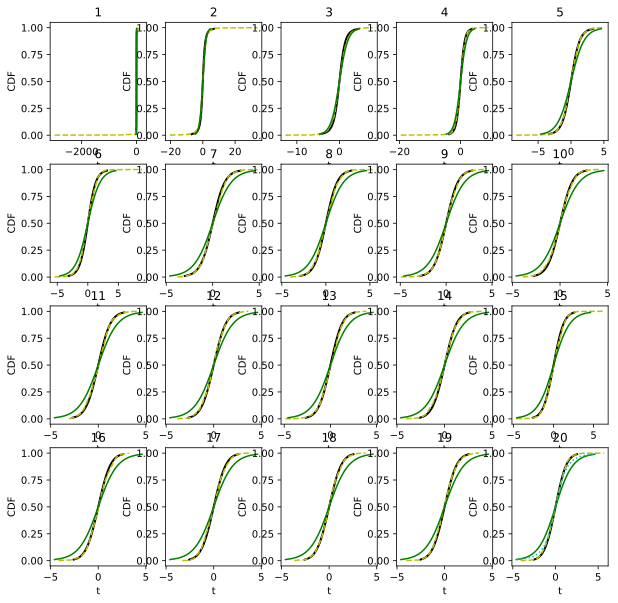

In [172]:
ntrials = 1000 # This is the number of times we will draw arrays of random numbers for each
# degree of freedom evaluated.
max_df = 20 # Maximum degrees of freedom tested.

pctiles = np.arange(0.01, 1.0, 0.01) #The array of cumulative probabilities for the student's t
# distribution that we would like to plot. 

fig = plt.figure(figsize=(10,10)) # This initializes a new figure window and calls it 'fig'. The
    # size given is in inches.

for df in range(1,max_df+1): # Loop over the degrees of freedom. Note how this for loop is called.
    # The colon is essential! The indent beneath specifies everything that is run as part of the
    # for loop. 
    # Comprehension check: What numbers does i include? How would you test this?
       
    X = np.random.logistic(0,1,(df+1, ntrials)) #Generates a matrix of random numbers, representing
    # n trials of random draws, each with sample size df + 1. The 0 and 1 arguments represent 
    # the mean and standard deviation of the normal distribution from which the samples will be
    # drawn. 
    
    X_mean = np.mean(X, 0) #Finds the mean of the numbers drawn from the distribution down the rows
    # (i.e., axis 0)
    
    X_std_err = np.std(X,0)/np.sqrt(df+1) #Finds the standard error of the mean
    
    X_t = X_mean/X_std_err # The t-statistic for the mean. (In other words, how far the mean is 
        # from the expected value relative to the standard error, where here, the expected value
        # is zero)
    
    X_sort = np.sort(X_t) # Sorts X_mean from low to high
    
    cum_prob = np.arange(1,len(X_sort)+1)/len(X_sort) #The cumulative probability value (i.e., 
                # percentile) associated with each value in X_sort. 
    
    actual_t = stats.t.ppf(pctiles, df) # The actual cumulative probability of the t distribution
    # for each percentile defined above

    k = stats.kstest(stats.t.rvs(pctiles,), 'norm')
    print(k, df)
    
    ax = fig.add_subplot(4, 5, df) # Makes subplot number 'df' in a 4 x 5 array of subplots
    ax.plot(actual_t, pctiles, 'k-', linewidth=2)
    #print(X_t)
    #print(cum_prob)
    ax.plot(X_sort, cum_prob, 'y--')
    ax.set_xlabel('t') #In other words, deviation from expected value, which is 0 here
    ax.set_ylabel('CDF')
    ax.set_title(df)
    actual_log = stats.logistic.ppf(pctiles) # The actual cumulative probability value of the 
    # normal distribution for each percentile defined above.
    ax.plot(actual_log, pctiles, 'g-')
    
actual_t = stats.t.ppf(pctiles, 3) # On this same plot, let's see how the t-distribution for 
    # 3 degrees of freedom looks.
ax.plot(actual_t, pctiles, 'c:')
plt.show() #This is outside the for loop, because it returns to the original indentation (or lack
    # thereof)


If I did it correctly, then at all df, the distribution is statistically indistinguishable from the Student’s t distribution